In [ ]:
import geopandas as gpd
import rasterio as rio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import matplotlib.pyplot as plt
from rasterio.plot import show
import os

In [13]:
dem_path = "DSM_AOI/20230915_clipped_ALS_DSM_CRS3035RES50000mN2650000E4500000.tif"

In [14]:
with rio.open(dem_path) as f:
    band = f.read(1)

In [17]:
f.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 2744,
 'height': 7227,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["ETRS89-extended / LAEA Europe",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",52],PARAMETER["longitude_of_center",10],PARAMETER["false_easting",4321000],PARAMETER["false_northing",3210000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Northing",NORTH],AXIS["Easting",EAST],AUTHORITY["EPSG","3035"]]'),
 'transform': Affine(1.0, 0.0, 4524323.5,
        0.0, -1.0, 2666120.5)}

In [19]:
band[band == f.nodata] == 0

array([False, False, False, ..., False, False, False])

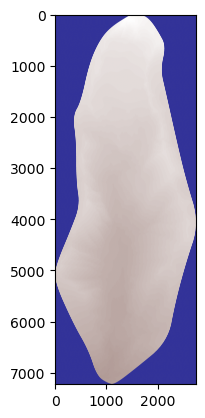

In [20]:
plt.imshow(band, cmap='terrain')

In [20]:
year = "2019"
out_dir = "WGS84"
os.makedirs(out_dir, exist_ok=True)

In [22]:
destination_crs = 'EPSG:4326'
with rio.open(f"ALS_DTM/{year}_ALS_DTM_CRS3035RES50000mN2650000E4500000.tif") as source:
    transform, width, height = calculate_default_transform(
        source.crs, 
        destination_crs,
        source.width,
        source.height,
        *source.bounds)
    kwargs = source.meta.copy()
    kwargs.update({
        "crs": destination_crs,
        "transform":transform,
        "width": width,
        "height": height
    })
    with rio.open(f"{out_dir}/{year}_DTM_wgs84.tif", 'w', **kwargs) as destination:
        reproject(
            source=rio.band(source, 1),
            destination=rio.band(destination, 1),
            src_transform=source.transform,
            src_crs=source.crs,
            dst_transform=transform,
            dst_crs=destination_crs,
            resampling=Resampling.nearest
        )

WarpOperationError: Chunk and warp failed